In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from collections import defaultdict

In [4]:
df_list[0] = pd.read_csv('/home/ia23938/Documents/GitHub/ValueSystemsAggregation/results_v1/egalsoc_10iteration_3diffagent.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/ia23938/Documents/GitHub/ValueSystemsAggregation/results_v1/egalsoc_10iteration_3diffagent.csv'

In [ ]:
data

,context,p_value,agent,satisfaction
0,0,0,45.0,0.085265
1,0,0,92.0,0.022995
2,0,0,23.0,0.107125
3,0,0,20.0,0.188564
4,0,1,45.0,0.011248
...,...,...,...,...
15595,74,2,59.0,0.127879
15596,74,3,84.0,0.048336
15597,74,3,97.0,0.350259
15598,74,3,66.0,0.009615


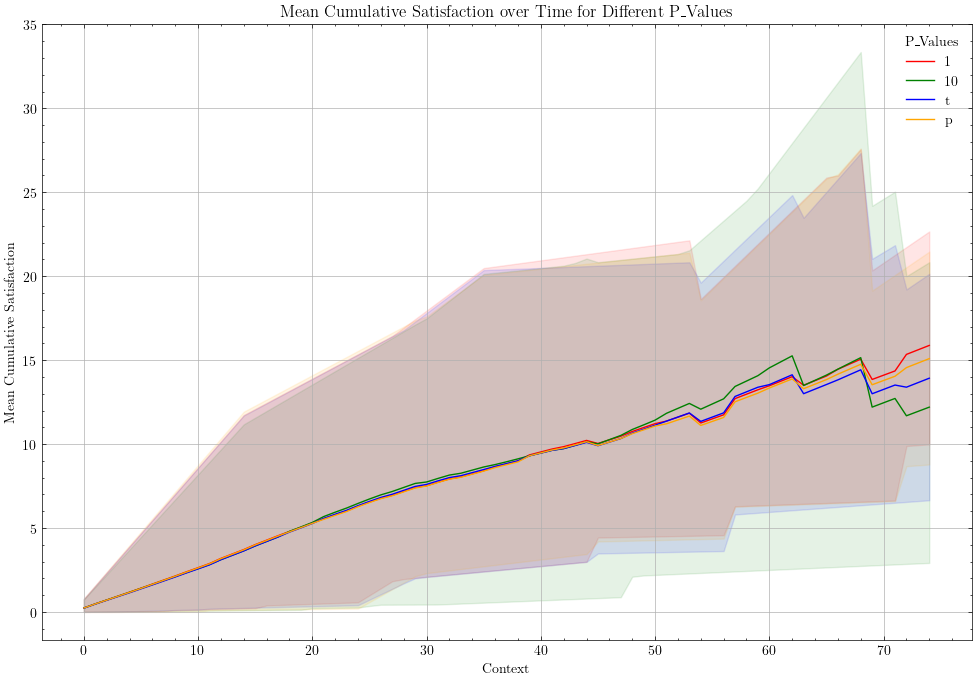

In [ ]:
df_dict = {}
unique_p_values = df_list[0]['p_value'].unique()
colours = ['red', 'green', 'blue', 'orange']
# Split the df_list[0]Frame by P_Value
for p_value in unique_p_values:
    df_dict[f'df_p_{p_value}'] = data[data['p_value'] == p_value].reset_index(drop=True)
for key in df_dict.keys():
    df_dict[key] = df_dict[key].sort_values(by=['agent', 'context']).reset_index(drop=True)
for key in df_dict:
    # Calculate cumulative sum of Satisfaction for each Agent
    df_dict[key]['Cumulative_Satisfaction'] = df_dict[key].groupby('agent')['satisfaction'].cumsum()

for key in df_dict:
    # Reset the Context for each Agent group
    df_dict[key]['context'] = df_dict[key].groupby('agent').cumcount()
    
plt.figure(figsize=(12, 8))
labels = ['1', '10', 't', 'p']
# Loop through each DataFrame in df_dict
for (key, colour, label) in zip(df_dict, colours, labels):
    # Calculate the mean, min, and max of Cumulative Satisfaction for each Context across all Agents
    mean_cum_satisfaction = df_dict[key].groupby('context')['Cumulative_Satisfaction'].mean()
    min_cum_satisfaction = df_dict[key].groupby('context')['Cumulative_Satisfaction'].min()
    max_cum_satisfaction = df_dict[key].groupby('context')['Cumulative_Satisfaction'].max()

    # Plot the line for this dataframe
    plt.plot(mean_cum_satisfaction, color=colour, label=label)
            # Plot the spread (shaded area)
    plt.fill_between(mean_cum_satisfaction.index,
                        min_cum_satisfaction,
                        max_cum_satisfaction,
                        color=colour, alpha=0.1)

# Add labels and title
plt.xlabel('Context')
plt.ylabel('Mean Cumulative Satisfaction')
plt.title('Mean Cumulative Satisfaction over Time for Different P_Values')
plt.legend(title='P_Values')
plt.grid(True)
plt.show()

# Transition Points Testing

In [14]:
plot_savename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/results_v1/plots/"
results_path = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/results_v1/"
results_filename = {'egal': "egalsoc_10iteration_3diffagent.csv", 'norm': "normsoc_10iteration_3diffagent.csv"}   
# Assuming you just have a folder name now e.g. 'experiment_results_v2/random_dist'
folders = 'experiment_results_v2/random_dist'
t_points = '/home/ia23938/Documents/GitHub/ValueSystemsAggregation/experiment_results_v2/random_dist/random_distrandom_dist_t_points.csv'
hcva_points = '/home/ia23938/Documents/GitHub/ValueSystemsAggregation/experiment_results_v2/random_dist/random_distrandom_dist_hcva_points.csv'

In [15]:
hcva_data = pd.read_csv(hcva_points)
t_data = pd.read_csv(t_points)

In [16]:
hcva_data

,points
0,3.1
1,1.6
2,1.7
3,1.7
4,1.6
...,...
145,3.6
146,1.6
147,3.4
148,2.3


In [17]:
hcva_data['time'] = hcva_data.index
t_data['time'] = t_data.index

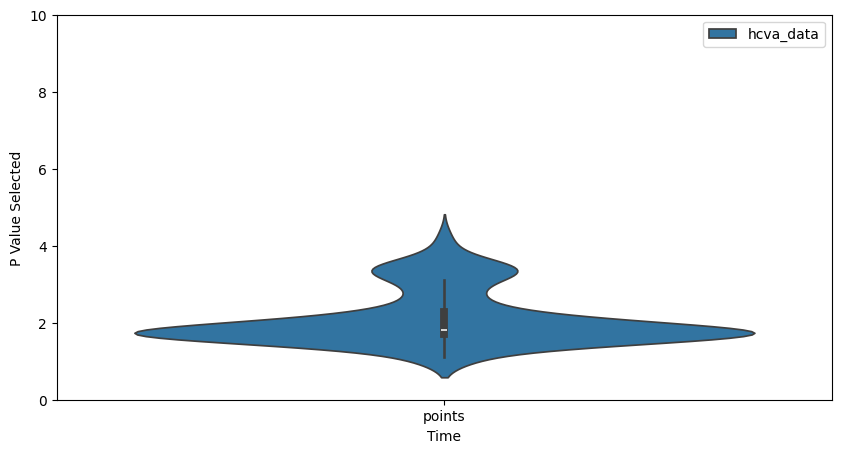

In [37]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.violinplot(data=[hcva_data['points']])
plt.xlabel('Time')
plt.ylabel('P Value Selected')
plt.ylim(0, 10)  # Set the y-axis limits
plt.legend(['hcva_data'])
plt.show()


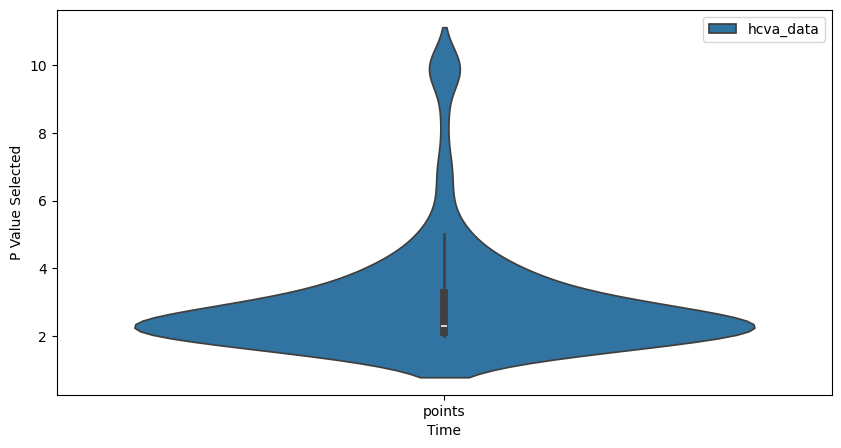

In [25]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.violinplot(data=[t_data['points']])
plt.xlabel('Time')
plt.ylabel('P Value Selected')
plt.legend(['hcva_data'])
plt.show()


## Limit P Plot testing

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import scienceplots

def plot_data(data: pd.DataFrame, title: str):
    """
    This function plots the limit P data (-t True).
    INPUT: data -- pd.DataFrame, title -- str (title of the plot)
    """

    plt.figure(figsize=(10, 5))
    plt.style.use("science")
    plt.plot(data["p"], data["Dist_p"], label="$||P^{(1)}_S-P^{(P)}_S||_p$")
    plt.plot(data["p"], data["Dist_inf"], label="$||P^{(\infty)}_S-P^{(P)}_S||_p$")
    plt.fill_between(data["p"], data["Dist_p"], data["Dist_inf"], where=(data["Dist_p"] >= data["Dist_inf"]) & (data["Dist_inf"] >= 0.05), color="blue", alpha=0.3, label="Egalitarian Zone")
    plt.fill_between(data["p"], data["Dist_p"], data["Dist_inf"], where=data["Dist_p"] <= data["Dist_inf"], color="green", alpha=0.3, label="Utilitarian Zone")

    #fill dark blue in fully egalitarian zone, $epsilon=0.05$. dist_inf is less than $epsilon$
    plt.fill_between(data["p"], data["Dist_p"], data["Dist_inf"], where=data["Dist_inf"] <= 0.05, color="darkblue", alpha=0.3, label="Fully Egalitarian Zone")
    # Mark the transition point
    transition_point = data.loc[data["Dist_p"] >= data["Dist_inf"], ["p", "Dist_p"]].iloc[0]
    plt.plot(transition_point["p"], transition_point["Dist_p"], "ro", label="Transition Point", markersize=10)
    plt.title(title)
    plt.xlabel("p")
    plt.ylabel("Distance")
    plt.legend()
    plt.show()


TypeError: '>=' not supported between instances of 'str' and 'float'

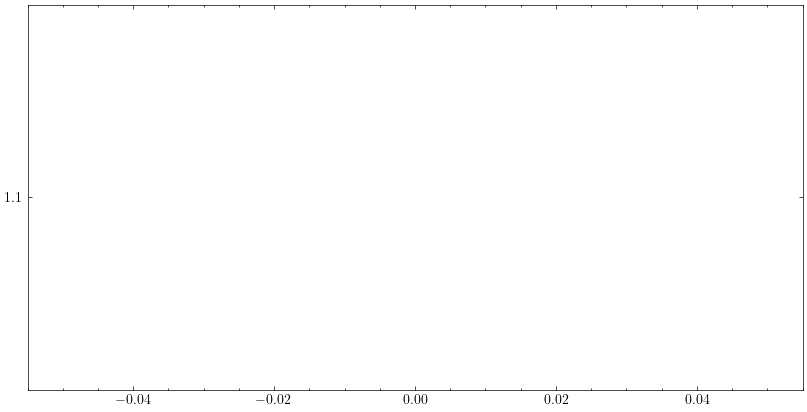

In [ ]:
data = pd.read_csv("/home/ia23938/Documents/GitHub/ValueSystemsAggregation/limit_p_files.csv")

# Split the data into multiple dataframes based on rows starting with 'p'
df_list = []
current_df = pd.DataFrame
for _, row in data.iterrows():
    if row['p'].startswith('p'):
        if current_df is not None:
            df_list.append(current_df)
        current_df = pd.DataFrame(columns=data.columns)
    current_df = df_list.append(row)
df_list.append(current_df)

data = df_list[0]
print(data)

plt.figure(figsize=(10, 5))
plt.style.use("science")
plt.plot(data["p"], data["Dist_p"], label="$||P^{(1)}_S-P^{(P)}_S||_p$")
plt.plot(data["p"], data["Dist_inf"], label="$||P^{(\infty)}_S-P^{(P)}_S||_p$")
plt.fill_between(data["p"], data["Dist_p"], data["Dist_inf"], where=(data["Dist_p"] >= data["Dist_inf"]) & (data["Dist_inf"] >= 0.05), color="blue", alpha=0.3, label="Egalitarian Zone")
plt.fill_between(data["p"], data["Dist_p"], data["Dist_inf"], where=data["Dist_p"] <= data["Dist_inf"], color="green", alpha=0.3, label="Utilitarian Zone")

#fill dark blue in fully egalitarian zone, $epsilon=0.05$. dist_inf is less than $epsilon$
plt.fill_between(data["p"], data["Dist_p"], data["Dist_inf"], where=data["Dist_inf"] <= 0.05, color="darkblue", alpha=0.3, label="Fully Egalitarian Zone")
# Mark the transition point
transition_point = data.loc[data["Dist_p"] >= data["Dist_inf"], ["p", "Dist_p"]].iloc[0]
plt.plot(transition_point["p"], transition_point["Dist_p"], "ro", label="Transition Point", markersize=10)
plt.title("title")
plt.xlabel("p")
plt.ylabel("Distance")
plt.legend()
plt.show()

RuntimeError: latex was not able to process the following string:
b'Distance between P_S and P_S^P for different p values'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpr4511jt8 32d64fa7c06922207ddada4e79fbccdf.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./32d64fa7c06922207ddada4e79fbccdf.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 32d64fa7c06922207ddada4e79fbccdf.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.29 {\rmfamily Distance between P_S and P_S^
                                             P for different p values}%
No pages of output.
Transcript written on tmpr4511jt8/32d64fa7c06922207ddada4e79fbccdf.log.




<Figure size 1000x500 with 1 Axes>